In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.datasets import load_iris
data = load_iris()
df = pd.DataFrame(data=data.data, columns=data.feature_names)
df['target'] = pd.Series(data.target)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Some Basic Information

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [4]:
# check columns
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

In [5]:
# Description of Numeric columns
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [6]:
# check null values %
df.isnull().sum() * 100 

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [7]:
df.sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
138,6.0,3.0,4.8,1.8,2
134,6.1,2.6,5.6,1.4,2
100,6.3,3.3,6.0,2.5,2
86,6.7,3.1,4.7,1.5,1
91,6.1,3.0,4.6,1.4,1


In [8]:
df['target'].value_counts()

0    50
1    50
2    50
Name: target, dtype: int64

# Observation:
    1. There are 5 cloumns - (4 Independent, 1 Dependent)
    2. Independet columns data type - float,  Dependet columns data type - int
    3. Non- Null Count - 150
    4. Data is balanced on target variable
    5. No missing values in  sepal length (cm), sepal width (cm), petal length (cm), petal width (cm)


#  Anlaysis

<AxesSubplot:xlabel='target', ylabel='count'>

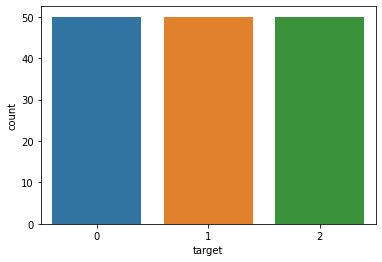

In [9]:
sns.countplot(df['target'])

<AxesSubplot:ylabel='target'>

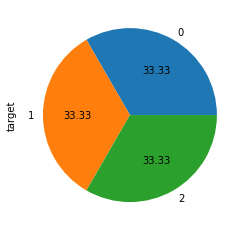

In [10]:
df['target'].value_counts().plot(kind='pie',autopct='%.2f')

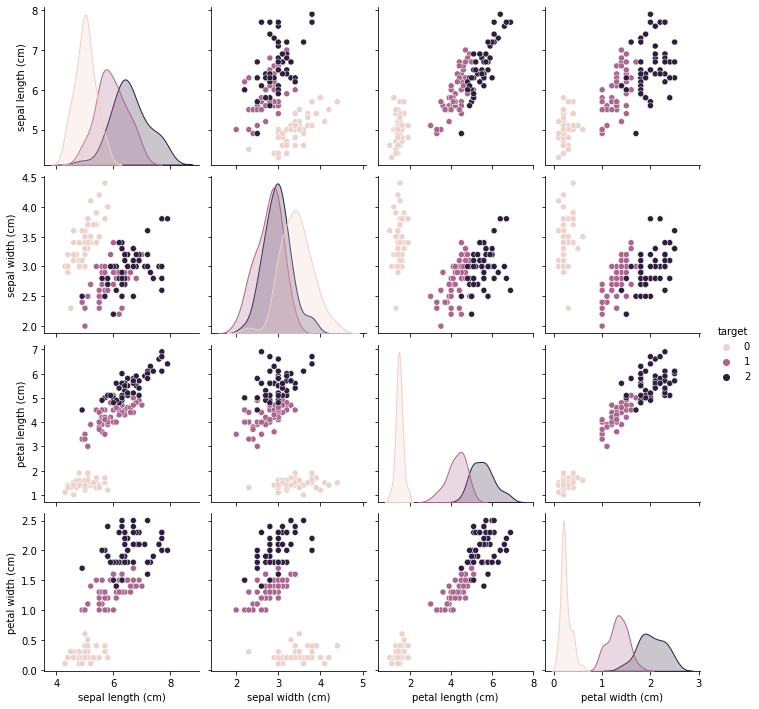

In [11]:
# Pair Plot b/w all variables
sns.pairplot(df,hue='target')

<AxesSubplot:xlabel='sepal width (cm)', ylabel='Density'>

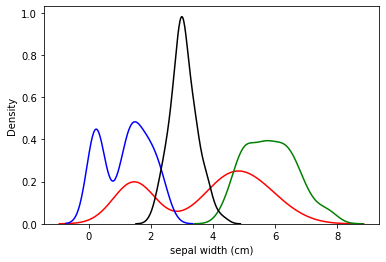

In [12]:
sns.distplot(df['petal length (cm)'],hist=False, color='r')
sns.distplot(df['petal width (cm)'],hist=False, color='b')
sns.distplot(df['sepal length (cm)'],hist=False, color='g')
sns.distplot(df['sepal width (cm)'],hist=False, color='black')

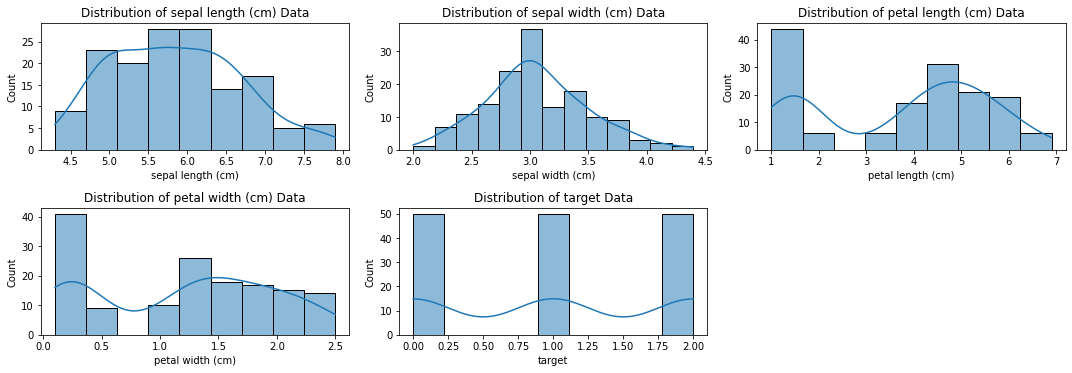

In [13]:
plt.figure(figsize=(15,10))
for i, col in enumerate(df.columns,1):
    plt.subplot(4,3,i)
    plt.title(f"Distribution of {col} Data")
    sns.histplot(df[col],kde=True)
    plt.tight_layout()
    plt.plot()
    

# Observations:
    1. sepal width is good normally distirbuted.
    2. sepal length is also having good distribution.

## Train - Test Split

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('target', axis=1),
                                                    df['target'],
                                                    test_size=0.3,
                                                    random_state=0)

In [15]:
X_train.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
60,5.0,2.0,3.5,1.0
116,6.5,3.0,5.5,1.8
144,6.7,3.3,5.7,2.5
119,6.0,2.2,5.0,1.5
108,6.7,2.5,5.8,1.8


## With and Without Standard Scaler

In [16]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

# fit_transform on train and transform on test sets
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [17]:
sc.mean_

array([5.89333333, 3.0447619 , 3.82857143, 1.22761905])

In [18]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)

In [19]:
X_train_scaled

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-1.023664,-2.378463,-0.182950,-0.293181
1,0.695175,-0.101903,0.930661,0.737246
2,0.924353,0.581065,1.042022,1.638870
3,0.122229,-1.923151,0.652258,0.350836
4,0.924353,-1.240183,1.097702,0.737246
...,...,...,...,...
100,-1.138253,0.125753,-1.296561,-1.452412
101,0.465996,-0.329559,0.986341,0.737246
102,-0.106950,-0.784871,0.151133,-0.293181
103,2.070245,1.719344,1.598827,1.252460


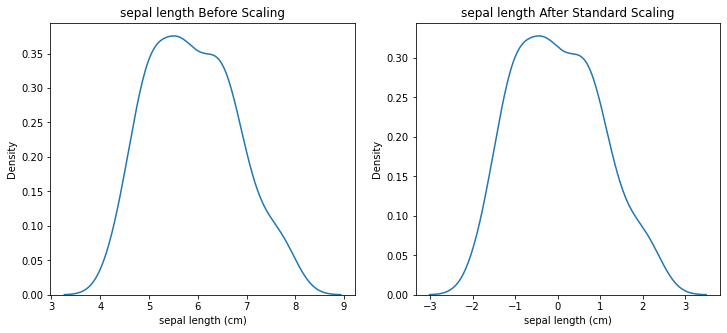

In [20]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))
# before scaling
ax1.set_title('sepal length Before Scaling')
sns.kdeplot(X_train['sepal length (cm)'], ax=ax1)

# after scaling
ax2.set_title('sepal length After Standard Scaling')
sns.kdeplot(X_train_scaled['sepal length (cm)'], ax=ax2)
plt.show()

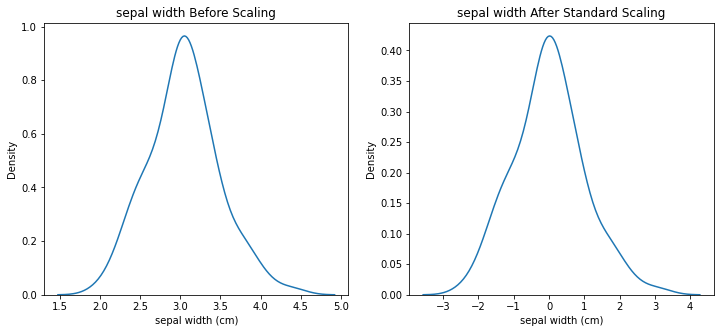

In [21]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))
# before scaling
ax1.set_title('sepal width Before Scaling')
sns.kdeplot(X_train['sepal width (cm)'], ax=ax1)

# after scaling
ax2.set_title('sepal width After Standard Scaling')
sns.kdeplot(X_train_scaled['sepal width (cm)'], ax=ax2)
plt.show()

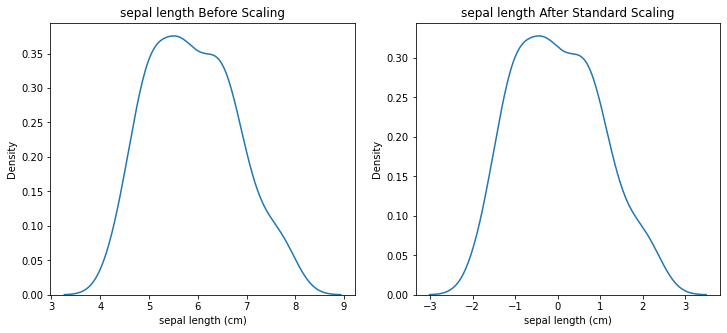

In [22]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))
# before scaling
ax1.set_title('sepal length Before Scaling')
sns.kdeplot(X_train['sepal length (cm)'], ax=ax1)

# after scaling
ax2.set_title('sepal length After Standard Scaling')
sns.kdeplot(X_train_scaled['sepal length (cm)'], ax=ax2)
plt.show()

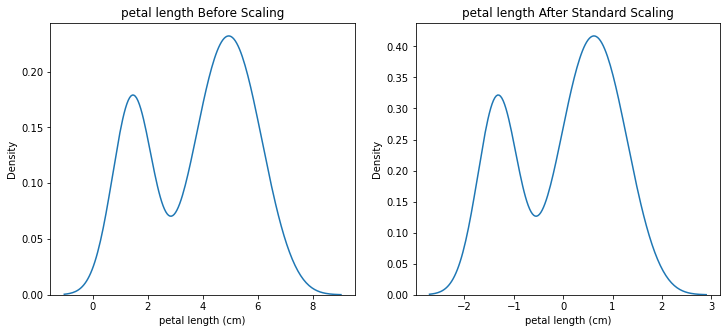

In [23]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))
# before scaling
ax1.set_title('petal length Before Scaling')
sns.kdeplot(X_train['petal length (cm)'], ax=ax1)

# after scaling
ax2.set_title('petal length After Standard Scaling')
sns.kdeplot(X_train_scaled['petal length (cm)'], ax=ax2)
plt.show()

# Try ML Models and check accuracy

# 1. Logistic Regression 

In [24]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [25]:
lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [26]:
lr.fit(X_train, y_train)

LogisticRegression()

In [27]:
lr_scaled.fit(X_train_scaled, y_train)

LogisticRegression()

In [28]:
y_pred = lr.predict(X_test)
y_pred_scaled = lr_scaled.predict(X_test_scaled)

In [29]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("Actual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_pred_scaled))
print("classification_report", classification_report(y_test,y_pred))
cm = confusion_matrix(y_test,y_pred)

Actual 0.9777777777777777
Scaled 0.9777777777777777
classification_report               precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



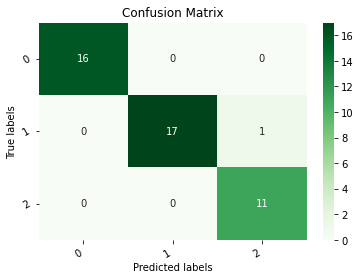

In [30]:
fig = plt.figure()
ax= fig.add_subplot(1,1,1)
sns.heatmap(cm, annot=True, cmap="Greens",ax = ax,fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

plt.setp(ax.get_yticklabels(), rotation=30, horizontalalignment='right')
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')     
plt.show()

In [31]:
from sklearn.model_selection import cross_val_score
print('Mean after cross_val_score : ', cross_val_score(lr, df.drop('target', axis=1), df['target'], scoring='accuracy', cv=5).mean() * 100)

Mean after cross_val_score :  97.33333333333334


# Observations:
    1. No effect of scaling

# 2. Decision Tree

In [32]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [33]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [34]:
y_pred = dt.predict(X_test)

In [35]:
print("Actual",accuracy_score(y_test,y_pred))

Actual 0.9777777777777777


In [36]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("Actual",accuracy_score(y_test,y_pred))
print("classification_report", classification_report(y_test,y_pred))
cm = confusion_matrix(y_test,y_pred)

Actual 0.9777777777777777
classification_report               precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



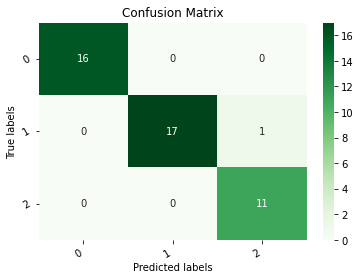

In [37]:
fig = plt.figure()
ax= fig.add_subplot(1,1,1)
sns.heatmap(cm, annot=True, cmap="Greens",ax = ax,fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

plt.setp(ax.get_yticklabels(), rotation=30, horizontalalignment='right')
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')     
plt.show()

In [38]:
from sklearn.model_selection import cross_val_score
print('Mean after cross_val_score : ', cross_val_score(dt, df.drop('target', axis=1), df['target'], scoring='accuracy', cv=5).mean() * 100)

Mean after cross_val_score :  95.33333333333334


# 3. RandomForest

In [39]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

In [40]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [41]:
y_pred = dt.predict(X_test)

In [42]:
print("Accuracy Score ",accuracy_score(y_test,y_pred))

Accuracy Score  0.9777777777777777


In [43]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("Actual",accuracy_score(y_test,y_pred))
print("classification_report", classification_report(y_test,y_pred))
cm = confusion_matrix(y_test,y_pred)

Actual 0.9777777777777777
classification_report               precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



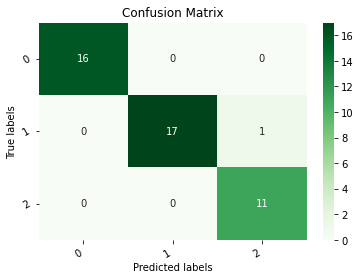

In [44]:
fig = plt.figure()
ax= fig.add_subplot(1,1,1)
sns.heatmap(cm, annot=True, cmap="Greens", ax = ax, fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

plt.setp(ax.get_yticklabels(), rotation=30, horizontalalignment='right')
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')     
plt.show()

In [45]:
from sklearn.model_selection import cross_val_score
print('Mean after cross_val_score : ', cross_val_score(rfc, df.drop('target', axis=1), df['target'], scoring='accuracy', cv=5).mean() * 100)

Mean after cross_val_score :  96.0


# 4. KNN

In [46]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier(n_neighbors=4)

In [47]:
knc.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=4)

In [48]:
y_pred = dt.predict(X_test)

In [49]:
print("Accuracy Score ",accuracy_score(y_test,y_pred))

Accuracy Score  0.9777777777777777


In [50]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("Actual",accuracy_score(y_test,y_pred))
print("classification_report", classification_report(y_test,y_pred))
cm = confusion_matrix(y_test,y_pred)

Actual 0.9777777777777777
classification_report               precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



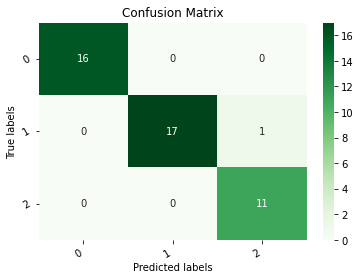

In [51]:
fig = plt.figure()
ax= fig.add_subplot(1,1,1)
sns.heatmap(cm, annot=True, cmap="Greens", ax = ax, fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

plt.setp(ax.get_yticklabels(), rotation=30, horizontalalignment='right')
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')     
plt.show()

In [52]:
from sklearn.model_selection import cross_val_score
print('Mean after cross_val_score : ', cross_val_score(knc, df.drop('target', axis=1), df['target'], scoring='accuracy', cv=5).mean() * 100)

Mean after cross_val_score :  97.33333333333334


# 5. XGBoost

In [53]:
!pip install xgboost

In [54]:
from xgboost import XGBClassifier
xgbc = XGBClassifier(objective="multi:softprob", random_state=42)

In [55]:
xgbc.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=42, reg_alpha=0, ...)

In [56]:
y_pred = xgbc.predict(X_test)

In [57]:
print("Accuracy Score ",accuracy_score(y_test,y_pred))

Accuracy Score  0.9777777777777777


In [58]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("Actual",accuracy_score(y_test,y_pred))
print("classification_report", classification_report(y_test,y_pred))
cm = confusion_matrix(y_test,y_pred)

Actual 0.9777777777777777
classification_report               precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



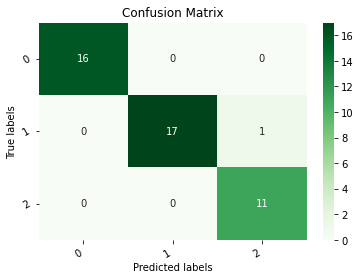

In [59]:
fig = plt.figure()
ax= fig.add_subplot(1,1,1)
sns.heatmap(cm, annot=True, cmap="Greens",ax = ax,fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

plt.setp(ax.get_yticklabels(), rotation=30, horizontalalignment='right')
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')     
plt.show()

In [60]:
from sklearn.model_selection import cross_val_score
print('Mean after cross_val_score : ', cross_val_score(xgbc, df.drop('target', axis=1), df['target'], scoring='accuracy', cv=5).mean() * 100)

Mean after cross_val_score :  96.0


In [61]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()

In [62]:
mnb.fit(X_train,y_train)

MultinomialNB()

In [63]:
y_pred = mnb.predict(X_test)

In [64]:
print("Accuracy Score ",accuracy_score(y_test,y_pred))

Accuracy Score  0.6


In [65]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("Accuracy Score ",accuracy_score(y_test,y_pred))
print("classification_report", classification_report(y_test,y_pred))
cm = confusion_matrix(y_test,y_pred)

Accuracy Score  0.6
classification_report               precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.00      0.00      0.00        18
           2       0.38      1.00      0.55        11

    accuracy                           0.60        45
   macro avg       0.46      0.67      0.52        45
weighted avg       0.45      0.60      0.49        45



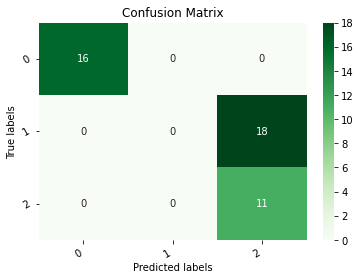

In [66]:
fig = plt.figure()
ax= fig.add_subplot(1,1,1)
sns.heatmap(cm, annot=True, cmap="Greens",ax = ax,fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

plt.setp(ax.get_yticklabels(), rotation=30, horizontalalignment='right')
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')     
plt.show()

In [67]:
from sklearn.model_selection import cross_val_score
print('Mean after cross_val_score in % : ', cross_val_score(xgbc, df.drop('target', axis=1), df['target'], scoring='accuracy', cv=5).mean() * 100)

Mean after cross_val_score in % :  96.0


# 6. Linear Support Vector Classifier

In [68]:
from sklearn.svm import LinearSVC
lsvc = LinearSVC()

In [69]:
lsvc.fit(X_train,y_train)

LinearSVC()

In [70]:
y_pred = lsvc.predict(X_test)

In [71]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("Accuracy Score ",accuracy_score(y_test,y_pred))
print("classification_report", classification_report(y_test,y_pred))
cm = confusion_matrix(y_test,y_pred)

Accuracy Score  0.9333333333333333
classification_report               precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.83      0.91        18
           2       0.79      1.00      0.88        11

    accuracy                           0.93        45
   macro avg       0.93      0.94      0.93        45
weighted avg       0.95      0.93      0.93        45



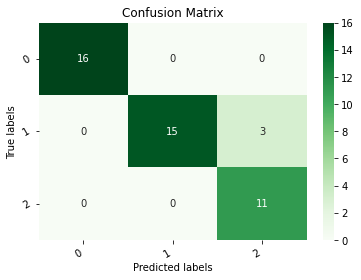

In [72]:
fig = plt.figure()
ax= fig.add_subplot(1,1,1)
sns.heatmap(cm, annot=True, cmap="Greens",ax = ax,fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

plt.setp(ax.get_yticklabels(), rotation=30, horizontalalignment='right')
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')     
plt.show()

In [73]:
from sklearn.model_selection import cross_val_score
print('Mean after cross_val_score in % : ', cross_val_score(xgbc, df.drop('target', axis=1), df['target'], scoring='accuracy', cv=5).mean() * 100)

Mean after cross_val_score in % :  96.0


# 7. AdaBoost

In [74]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier()

In [75]:
abc.fit(X_train,y_train)

AdaBoostClassifier()

In [76]:
y_pred = lsvc.predict(X_test)

In [77]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("Accuracy Score ",accuracy_score(y_test,y_pred))
print("classification_report", classification_report(y_test,y_pred))
cm = confusion_matrix(y_test,y_pred)

Accuracy Score  0.9333333333333333
classification_report               precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.83      0.91        18
           2       0.79      1.00      0.88        11

    accuracy                           0.93        45
   macro avg       0.93      0.94      0.93        45
weighted avg       0.95      0.93      0.93        45



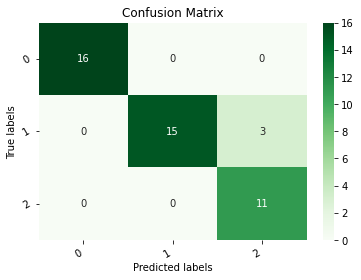

In [78]:
fig = plt.figure()
ax= fig.add_subplot(1,1,1)
sns.heatmap(cm, annot=True, cmap="Greens",ax = ax,fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

plt.setp(ax.get_yticklabels(), rotation=30, horizontalalignment='right')
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')     
plt.show()

In [79]:
# df.corr() 
X_train.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
60,5.0,2.0,3.5,1.0
116,6.5,3.0,5.5,1.8
144,6.7,3.3,5.7,2.5
119,6.0,2.2,5.0,1.5
108,6.7,2.5,5.8,1.8


In [80]:
y_train.head()

60     1
116    2
144    2
119    2
108    2
Name: target, dtype: int64

In [81]:
X_train.iloc[1].values.reshape(1,4)

array([[6.5, 3. , 5.5, 1.8]])

In [82]:
np.array([[5, 2, 3.5, 1]]).shape

(1, 4)

In [83]:
lr.predict([[100, 2000, 3.5, 1000]])

array([0])

In [84]:
lr.predict(X_train.iloc[1].values.reshape(1,4))

array([2])

In [85]:
lr.predict([[100, 2000, 3.5, 1000]])

array([0])

In [87]:
import pickle
# save the model to disk
filename = 'finalized_model.pkl'
pickle.dump(lr, open(filename, 'wb'))

In [88]:
X_train

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
60,5.0,2.0,3.5,1.0
116,6.5,3.0,5.5,1.8
144,6.7,3.3,5.7,2.5
119,6.0,2.2,5.0,1.5
108,6.7,2.5,5.8,1.8
...,...,...,...,...
9,4.9,3.1,1.5,0.1
103,6.3,2.9,5.6,1.8
67,5.8,2.7,4.1,1.0
117,7.7,3.8,6.7,2.2
